# Влияние функций активации на классификацию

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tf
import random as python_random

In [2]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

def classification_visualisation(xx, yy, classes):
  classes = classes.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, classes, cmap=cmap_light)
  plt.show()


def seed_random(seed=123):
  # The below is necessary for starting Numpy generated random numbers
  # in a well-defined initial state.
  np.random.seed(123)

  # The below is necessary for starting core Python generated random numbers
  # in a well-defined state.
  python_random.seed(123)

  # The below set_seed() will make random number generation
  # in the TensorFlow backend have a well-defined initial state.
  # For further details, see:
  # https://www.tensorflow.org/api_docs/python/tf/random/set_seed
  tf.random.set_seed(1234)

In [11]:
np.linspace(-2, 2, 100)

array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
       -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
       -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
       -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
       -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
       -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
       -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
       -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
       -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
       -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
        0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
        0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
        0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
        0.62626263,  0.66666667,  0.70707071,  0.74747475,  0.78

In [12]:
np.linspace(-2, 2, 100).shape

(100,)

In [16]:
np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))[0]

array([[-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
         1.95959596,  2.        ],
       [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
         1.95959596,  2.        ],
       [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
         1.95959596,  2.        ],
       ...,
       [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
         1.95959596,  2.        ],
       [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
         1.95959596,  2.        ],
       [-2.        , -1.95959596, -1.91919192, ...,  1.91919192,
         1.95959596,  2.        ]])

In [15]:
np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))[1]

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.95959596, -1.95959596, -1.95959596, ..., -1.95959596,
        -1.95959596, -1.95959596],
       [-1.91919192, -1.91919192, -1.91919192, ..., -1.91919192,
        -1.91919192, -1.91919192],
       ...,
       [ 1.91919192,  1.91919192,  1.91919192, ...,  1.91919192,
         1.91919192,  1.91919192],
       [ 1.95959596,  1.95959596,  1.95959596, ...,  1.95959596,
         1.95959596,  1.95959596],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

In [17]:
# создание обучающих данных
x1, x2 = np.meshgrid(np.linspace(-2, 2, 100),
                     np.linspace(-2, 2, 100))
train_X = np.c_[x1.ravel(), x2.ravel()]
train_y = train_X[:, 1] > np.sin(train_X [:, 0]*6)

In [25]:
x1.ravel()[98:102]

array([ 1.95959596,  2.        , -2.        , -1.95959596])

In [23]:
x2.ravel()[98:102]

array([-2.        , -2.        , -1.95959596, -1.95959596])

In [26]:
train_X

array([[-2.        , -2.        ],
       [-1.95959596, -2.        ],
       [-1.91919192, -2.        ],
       ...,
       [ 1.91919192,  2.        ],
       [ 1.95959596,  2.        ],
       [ 2.        ,  2.        ]])

In [30]:
train_X[98:102, :]

array([[ 1.95959596, -2.        ],
       [ 2.        , -2.        ],
       [-2.        , -1.95959596],
       [-1.95959596, -1.95959596]])

In [32]:
train_y

array([False, False, False, ...,  True,  True,  True])

In [33]:
train_y[98:102]

array([False, False, False, False])

In [34]:
train_X.shape, train_y.shape

((10000, 2), (10000,))

In [35]:
train_X[-1]

array([2., 2.])

In [36]:
train_y[-1]

True

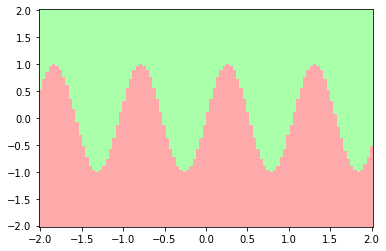

In [37]:
classification_visualisation(x1, x2, train_y)

создаем какую-нибудь модель

In [38]:
def model_experiment(model, seed=123):
  seed_random(seed)
  model.compile(loss='mse', optimizer='Adam')
  model.fit(train_X, train_y, epochs=50, batch_size=512, verbose=0)
  classification_visualisation(x1, x2, model.predict(train_X))

2022-07-01 16:14:14.708829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


313/313 [==============================] - 0s 732us/step


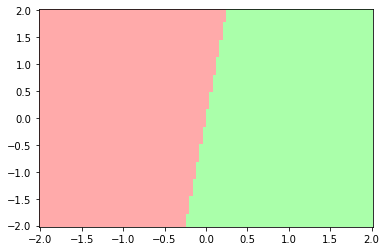

In [39]:
model = Sequential([
  Dense(1, activation='sigmoid', input_shape=(2,))
])

model_experiment(model)

313/313 [==============================] - 0s 697us/step


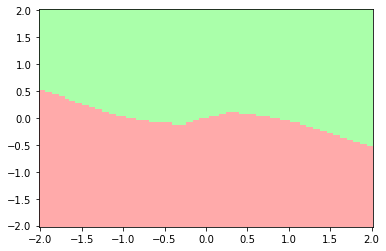

In [40]:
model = Sequential([
  Dense(200, activation='relu', input_shape=(2,)), 
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 0s 694us/step


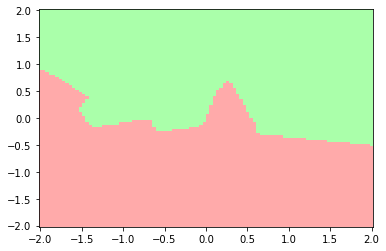

In [41]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(20, activation='relu'),
  Dense(20, activation='relu'),
  Dense(20, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 0s 665us/step


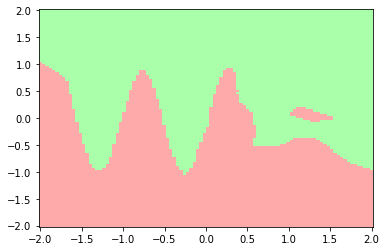

In [52]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 0s 627us/step


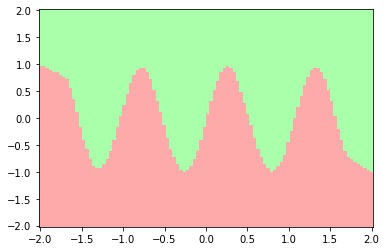

In [47]:
model = Sequential([
  # Dense(5, activation='relu', input_shape=(2,)), 
  Flatten(),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

кек

313/313 [==============================] - 0s 1ms/step


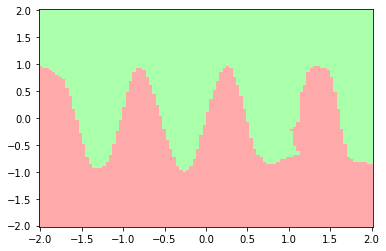

In [48]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(100, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1000, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

313/313 [==============================] - 1s 2ms/step


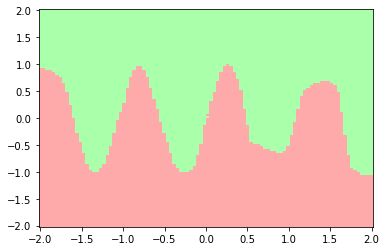

In [44]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(2,)), 
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(500, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_experiment(model)

# Смещение распределений во время обучения

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return x  *  (x  >  0)


def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

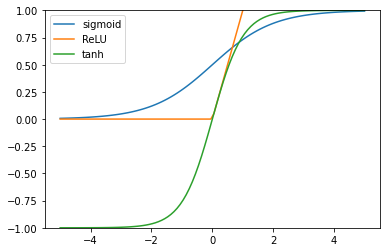

In [62]:
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, ReLU(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')
ax.set_ylim(-1, 1)
ax.legend()
plt.show()

In [63]:
dist = np.random.normal(size=100000)

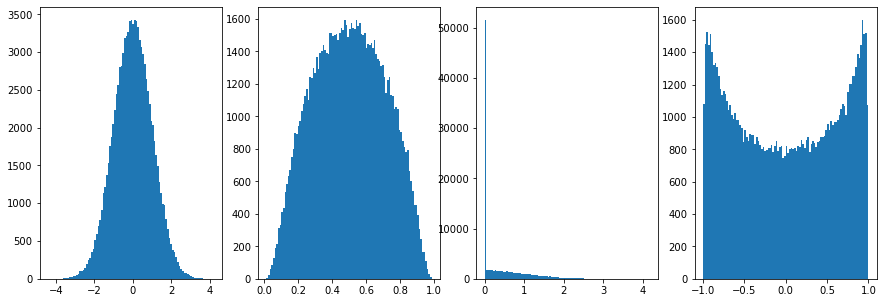

In [64]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
_ = axes[0].hist(dist, bins=100)
_ = axes[1].hist(sigmoid(dist), bins=100)
_ = axes[2].hist(ReLU(dist), bins=100)
_ = axes[3].hist(tanh(dist), bins=100)

In [65]:
def normalize(dist):
    return 2 * (dist - np.mean(dist))/np.std(dist) + 4

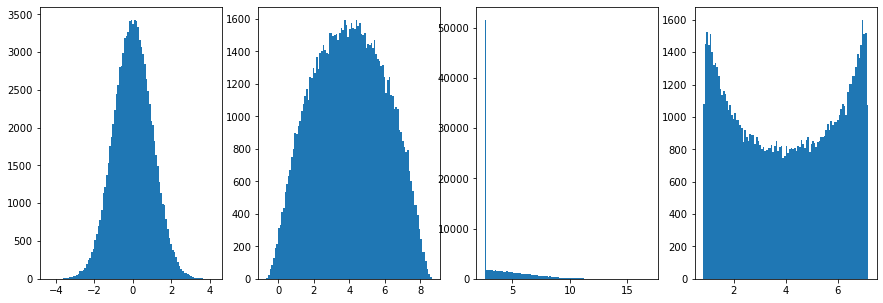

In [66]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
_ = axes[0].hist(dist, bins=100)
_ = axes[1].hist(normalize(sigmoid(dist)), bins=100)
_ = axes[2].hist(normalize(ReLU(dist)), bins=100)
_ = axes[3].hist(normalize(tanh(dist)), bins=100)

# TensorFlow

In [67]:
# !pip install tensorflow

In [68]:
import tensorflow as tf

print(tf.__version__)
msg = tf.constant('TensorFlow Hello World')
tf.print(msg)

2.9.1
TensorFlow Hello World


In [69]:
tf.test.is_built_with_cuda()

False

In [70]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [71]:
msg

<tf.Tensor: shape=(), dtype=string, numpy=b'TensorFlow Hello World'>

In [72]:
# создание тензора

A = tf.constant([[3, 2], 
                 [5, 2]], dtype='int32')

print(A)


tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [73]:
# перевод тензора в объект numpy

A.numpy()

array([[3, 2],
       [5, 2]], dtype=int32)

In [74]:
# конкатенация тензоров

B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())


[[3 2 9 5]
 [5 2 1 3]]


In [75]:
# сложение и вычитание тензоров
AB_sum = A + B
AB_dif = A - B

print(AB_sum)
print(AB_dif)

tf.Tensor(
[[12  7]
 [ 6  5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-6 -3]
 [ 4 -1]], shape=(2, 2), dtype=int32)


In [76]:
# изменение размерности

tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE:\n {tensor.numpy()}')
print(f'AFTER:\n {resh_tensor.numpy()}')

BEFORE:
 [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER:
 [[3 2 5 2 9 5 1 3]]


In [79]:
resh_tensor

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[3, 2, 5, 2, 9, 5, 1, 3]], dtype=int32)>

In [80]:
# поэлементное перемножение матриц

A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[5, 5],
                 [500, 500]])

AB = tf.multiply(A, B)
print(AB)

print(A*B)

tf.Tensor(
[[  15   35]
 [ 500 4500]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[  15   35]
 [ 500 4500]], shape=(2, 2), dtype=int32)


In [81]:
# матричное умножение 

A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[5, 5],
                 [500, 500]])

AB = tf.matmul(A, B)
print(AB)

print(A@B)

tf.Tensor(
[[3515 3515]
 [4505 4505]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3515 3515]
 [4505 4505]], shape=(2, 2), dtype=int32)


# Fashion mnist

In [7]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.9.1


## Данные

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
print(train_images.shape, len(train_labels), train_labels, sep='\n')

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [12]:
print(test_images.shape, len(test_labels), test_labels, sep='\n')


(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


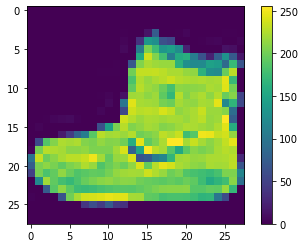

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0


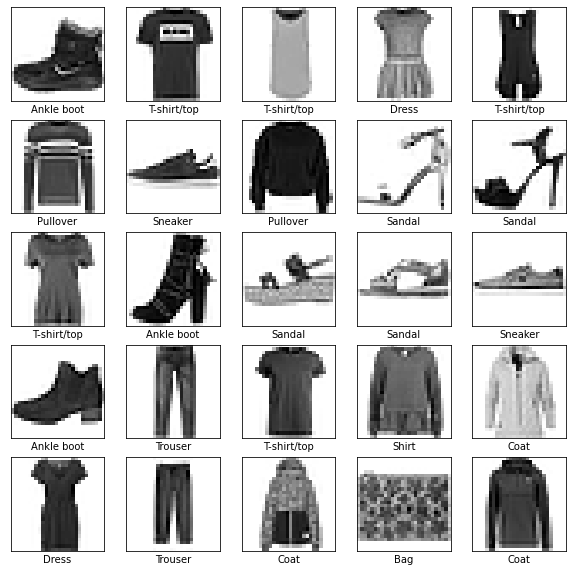

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Обучение

In [16]:
import sys
sys.executable

'/Users/ildar/opt/anaconda3/bin/python'

In [17]:
# !python -m pip install pip --upgrade

In [18]:
# !pip install graphviz

In [19]:
# import graphviz

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.L2(l2=100),
                       bias_regularizer=tf.keras.regularizers.L2(l2=0.5)),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10)
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                      

In [29]:
28 * 28

784

In [25]:
from keras.utils.vis_utils import plot_model

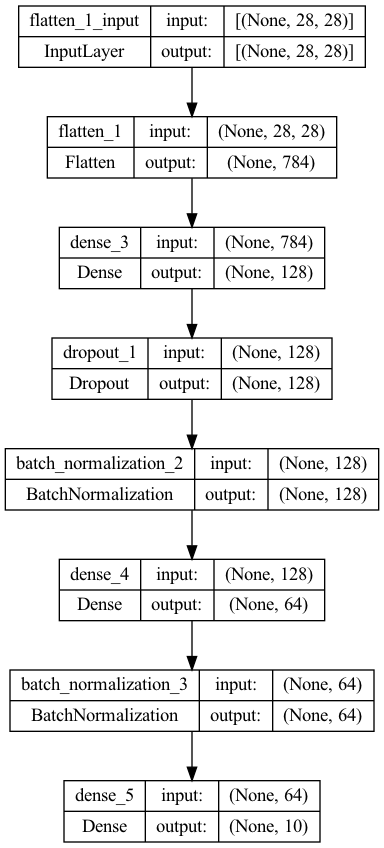

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [30]:
boundaries = [2000, 4000]
values = [0.01, 0.005, 0.001]
lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
hstr = model.fit(train_images, train_labels, epochs=3, verbose=2)

Epoch 1/3
1875/1875 - 3s - loss: 55.4031 - accuracy: 0.4559 - 3s/epoch - 2ms/step
Epoch 2/3
1875/1875 - 2s - loss: 7.4426 - accuracy: 0.4789 - 2s/epoch - 1ms/step
Epoch 3/3
1875/1875 - 3s - loss: 3.6132 - accuracy: 0.5584 - 3s/epoch - 2ms/step


In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [33]:
hstr = model.fit(train_images, train_labels, epochs=3, verbose=1)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4993 - accuracy: 0.8248
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3750 - accuracy: 0.8658
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.8772


In [34]:
hstr.params

{'verbose': 1, 'epochs': 3, 'steps': 1875}

In [35]:
hstr.history

{'loss': [0.4992852509021759, 0.37499892711639404, 0.33778050541877747],
 'accuracy': [0.8247666954994202, 0.8657500147819519, 0.8772333264350891]}

In [36]:
hstr.model

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


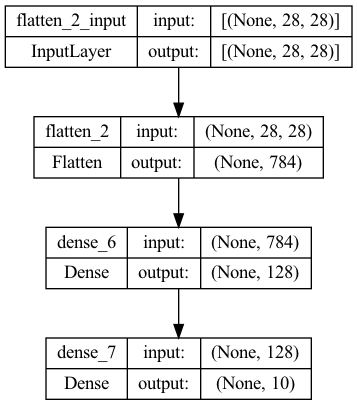

In [38]:
# from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

## Результаты

In [39]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [40]:
model.predict(test_images)

313/313 [==============================] - 0s 844us/step


array([[ -6.2451787 , -10.113926  ,  -8.949446  , ...,   2.5449226 ,
         -4.534203  ,   4.374203  ],
       [ -0.72852343, -10.889138  ,   9.089064  , ..., -11.361326  ,
         -4.595441  , -16.402363  ],
       [  0.8199914 ,  12.427435  ,  -1.6740605 , ..., -10.576582  ,
         -6.487289  ,  -9.975817  ],
       ...,
       [ -0.53023815, -12.687778  ,  -1.5530959 , ...,  -7.823908  ,
          8.223891  , -12.733246  ],
       [ -4.1454387 ,  10.719359  ,  -4.6178493 , ..., -10.277169  ,
         -8.344298  ,  -4.276506  ],
       [ -4.158185  ,  -9.329102  ,  -4.81744   , ...,   0.9832839 ,
         -1.5425928 ,  -4.02198   ]], dtype=float32)

In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 982us/step


In [42]:
print(predictions[0],
      np.argmax(predictions[0]),
      test_labels[0],
      sep='\n')

[1.96200090e-05 4.09754591e-07 1.31295906e-06 8.48562593e-07
 2.68879626e-06 6.81216791e-02 6.09436302e-06 1.28881827e-01
 1.08584165e-04 8.02856922e-01]
9
9


## Визуализация

In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 19ms/step
[[5.2600211e-05 2.0336997e-09 9.6540982e-01 2.4670733e-06 5.7239858e-03
  2.1203799e-09 2.8810035e-02 1.2682926e-09 1.1005417e-06 8.2020987e-12]]


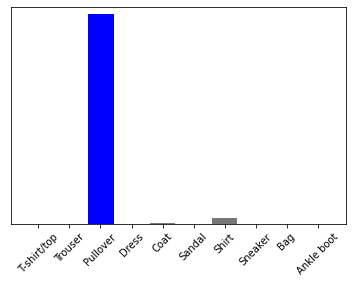

In [44]:
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

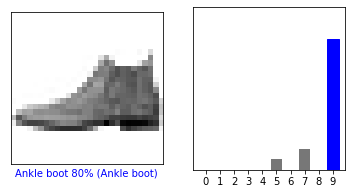

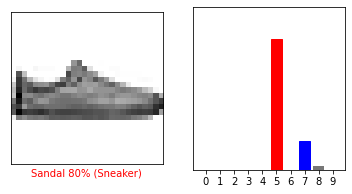

In [45]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


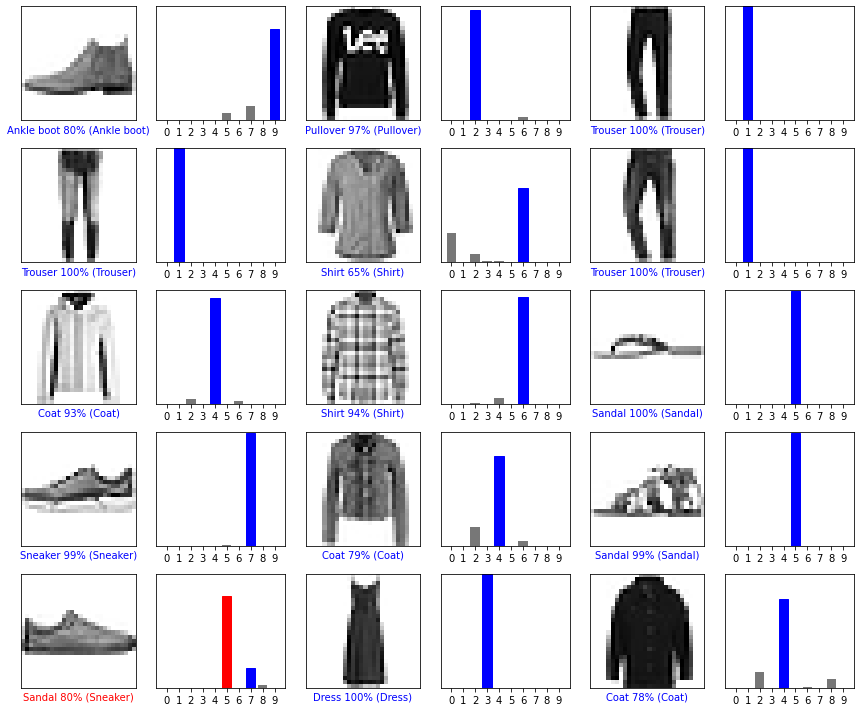

In [46]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Домашнее задание

# Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [113]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [3]:
data = load_wine()

In [7]:
data.data.shape, data.target.shape

((178, 13), (178,))

In [48]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [38]:
pd.DataFrame(to_categorical(data.target), columns=data.target_names)

,class_0,class_1,class_2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
173,0.0,0.0,1.0
174,0.0,0.0,1.0
175,0.0,0.0,1.0
176,0.0,0.0,1.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data.data, columns=data.feature_names), 
                                                    pd.DataFrame(to_categorical(data.target), columns=data.target_names), 
                                                    test_size=0.25, shuffle=True, random_state=0)

## Посмотрим на данные

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133, 3), (45, 3))

In [41]:
y_train.head()

,class_0,class_1,class_2
19,1.0,0.0,0.0
135,0.0,0.0,1.0
74,0.0,1.0,0.0
144,0.0,0.0,1.0
16,1.0,0.0,0.0


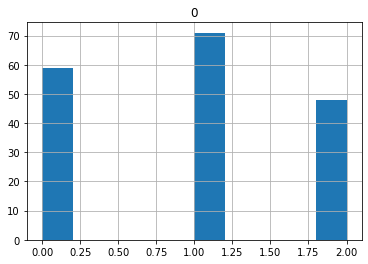

In [42]:
_ = pd.DataFrame(data.target).hist()

In [43]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 19 to 172
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       133 non-null    float64
 1   malic_acid                    133 non-null    float64
 2   ash                           133 non-null    float64
 3   alcalinity_of_ash             133 non-null    float64
 4   magnesium                     133 non-null    float64
 5   total_phenols                 133 non-null    float64
 6   flavanoids                    133 non-null    float64
 7   nonflavanoid_phenols          133 non-null    float64
 8   proanthocyanins               133 non-null    float64
 9   color_intensity               133 non-null    float64
 10  hue                           133 non-null    float64
 11  od280/od315_of_diluted_wines  133 non-null    float64
 12  proline                       133 non-null    float64
dtypes: f

In [45]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,133.000000,133.000000,133.000000,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,12.999398,2.390977,2.365489,19.51203,100.458647,2.261579,1.956917,0.363985,1.609474,5.113083,0.947338,2.586015,749.812030
std,0.803811,1.122554,0.271995,3.52532,14.484846,0.613286,0.984769,0.127873,0.601056,2.405212,0.233392,0.725185,303.322165
min,11.030000,0.890000,1.360000,10.60000,70.000000,1.100000,0.470000,0.130000,0.420000,1.280000,0.540000,1.270000,312.000000
25%,12.370000,1.610000,2.210000,17.10000,89.000000,1.700000,1.020000,0.270000,1.150000,3.210000,0.770000,1.860000,515.000000
50%,13.050000,1.900000,2.360000,19.50000,98.000000,2.200000,2.040000,0.340000,1.560000,4.600000,0.950000,2.770000,675.000000
75%,13.640000,3.240000,2.560000,21.50000,107.000000,2.740000,2.790000,0.450000,1.960000,6.600000,1.110000,3.170000,985.000000
max,14.750000,5.650000,3.220000,30.00000,162.000000,3.880000,3.740000,0.660000,3.580000,13.000000,1.710000,4.000000,1547.000000


Нужна будет стндартизация признаков

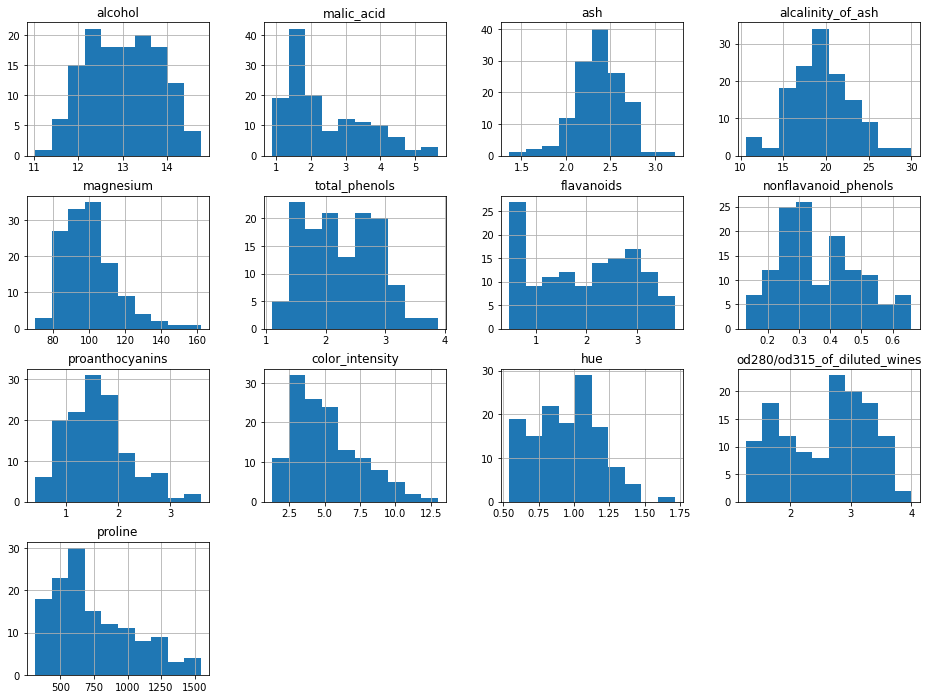

In [46]:
_ = X_train.hist(figsize=(16,12))

Распределения в целом близки к нормальному. 

Можно еще попробовать прологарифмировать:

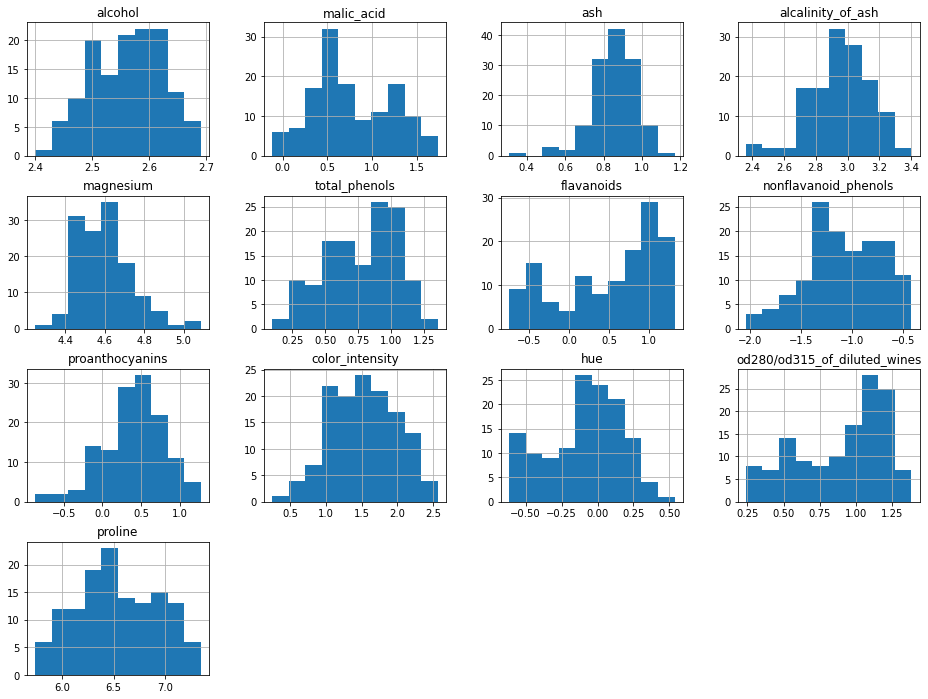

In [47]:
_ = X_train.apply(lambda x: np.log(x), axis=1).hist(figsize=(16,12))

Вот теперь совсем нормальные распределения

## Масштабируем признаки

In [115]:
scaler = StandardScaler()

In [116]:
scaler.fit(X_train)

StandardScaler()

In [123]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [124]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [126]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02
mean,1.911587e-15,-1.386944e-15,-1.398213e-16,2.325834e-15,-3.330669e-16,-8.564578e-16,6.627948e-16,-1.162813e-15,6.711423e-16,-7.078715e-16,-7.078715e-16,5.559463e-16,-5.008525e-18
std,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00,1.003781e+00
min,-2.459340e+00,-1.342165e+00,-3.710701e+00,-2.537563e+00,-2.110744e+00,-1.901186e+00,-1.515623e+00,-1.836746e+00,-1.986454e+00,-1.599682e+00,-1.751894e+00,-1.821590e+00,-1.448847e+00
25%,-7.859786e-01,-6.983452e-01,-5.738226e-01,-6.867884e-01,-7.940691e-01,-9.191508e-01,-9.550052e-01,-7.377674e-01,-7.673338e-01,-7.942244e-01,-7.627025e-01,-1.004929e+00,-7.770609e-01
50%,6.319001e-02,-4.390290e-01,-2.025583e-02,-3.425379e-03,-1.703810e-01,-1.007879e-01,8.468668e-02,-1.882782e-01,-8.262243e-02,-2.141277e-01,1.144733e-02,2.546667e-01,-2.475746e-01
75%,7.999687e-01,7.591908e-01,7.178332e-01,5.660438e-01,4.533072e-01,7.830441e-01,8.491660e-01,6.752047e-01,5.853887e-01,6.205437e-01,6.995805e-01,8.083352e-01,7.783050e-01
max,2.186112e+00,2.914198e+00,3.153527e+00,2.986288e+00,4.264735e+00,2.648912e+00,1.817507e+00,2.323672e+00,3.290834e+00,3.291492e+00,3.280080e+00,1.957197e+00,2.638125e+00


In [127]:
X_test.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.006024,-0.193225,0.015008,-0.019244,-0.196560,0.217101,0.291719,-0.066170,-0.122703,-0.090782,0.172012,0.140549,-0.038207
std,1.054367,0.981319,1.049109,0.783774,0.942597,1.078075,1.040316,0.901809,0.800730,0.858197,0.917692,0.920491,1.159696
min,-1.984805,-1.476294,-2.455949,-1.569466,-1.556355,-2.097593,-1.648133,-1.522752,-2.003154,-1.299201,-2.009944,-1.738540,-1.561362
25%,-0.798466,-0.769881,-0.721440,-0.544421,-0.863368,-0.755478,-0.506511,-0.659269,-0.583631,-0.777531,-0.289611,-0.437419,-0.892886
50%,0.063190,-0.564216,-0.167874,-0.003425,-0.308978,0.357495,0.319127,-0.345275,-0.116023,-0.088927,0.398522,0.351559,-0.297214
75%,0.912359,0.177965,0.644024,0.423677,0.453307,1.126757,1.042834,0.439709,0.435086,0.307542,0.742589,0.822177,0.976862
max,2.286014,3.048327,3.190431,2.559186,2.185774,2.059690,3.183376,2.088177,1.403702,2.373354,1.860805,1.708046,3.078261


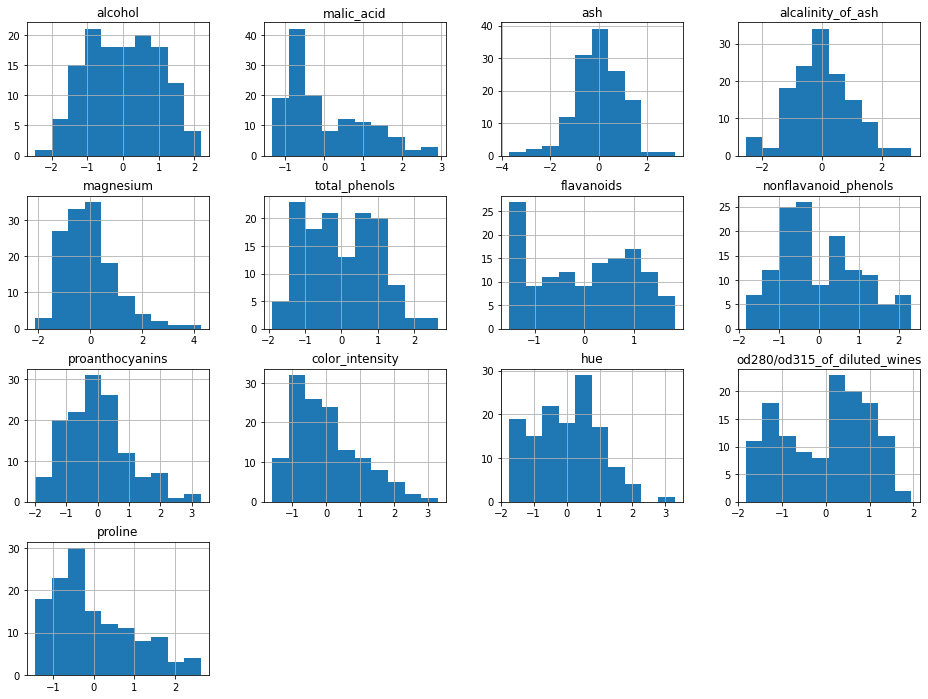

In [128]:
_ = X_train.hist(figsize=(16, 12))

Похоже на правду

## Создаем модель

In [159]:
model = Sequential([
    Flatten(),
    # Dense(13, activation='relu'),
    Dense(128, activation='tanh'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [160]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Обучим

In [161]:
model.fit(X_train, 
          y_train,
          epochs=20,
          batch_size=32
         )

Epoch 1/20
5/5 [==============================] - 0s 2ms/step - loss: 1.0677 - accuracy: 0.4211
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.9398
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.9624
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9774
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9850
Epoch 6/20
5/5 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9925
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0793 - accuracy: 0.9925
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9925
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9925
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9925
Epoch 11/20
5/5 [======================

## Оценим

In [162]:
# Evaluate the model.
model.evaluate(
  X_test,
  y_test
)

2/2 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 1.0000


[0.014548389241099358, 1.0]

Хорошая точность. Сравним с logreg или бустингом

## LogReg

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [167]:
lg = OneVsRestClassifier(LogisticRegression(random_state=42))

In [168]:
lg.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=42))

In [172]:
pred = lg.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

1.0

В пригнципе логрег тоже справился на изи

## LightGBM

In [175]:
from lightgbm import LGBMClassifier

In [228]:
lgbm = OneVsRestClassifier(LGBMClassifier(random_state=42, 
                                         max_depth=8,
                                          n_estimators=200,
                                          # learning_rate=0.05,
                                         ))

In [229]:
lgbm.fit(X_train, y_train)

OneVsRestClassifier(estimator=LGBMClassifier(max_depth=8, n_estimators=200,
                                             random_state=42))

In [230]:
pred = lgbm.predict(X_test)

In [231]:
accuracy_score(y_test, pred)

0.9555555555555556

Бустинг уже на изи не справляется. Мне сложно сказать почему.

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [67]:
len(classes)

36

In [72]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
y = np.load('binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [73]:
len(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))

26

In [74]:
X.shape, y.shape

((1404, 20, 16), (1404,))

In [78]:
y[:10]

array([33, 21, 16, 26, 23, 10,  7, 19, 24, 10])

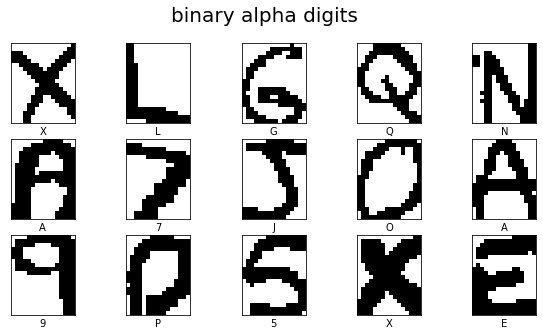

In [75]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1